In [65]:
import pandas as pd

In [66]:
df = pd.read_csv('data.csv')

In [67]:
import matplotlib.pyplot as plt

In [68]:
import numpy as np

In [69]:
df1 = df[df['Group'] == 1]

In [70]:
df2 = df[df['Group'] == 2]

In [71]:
mu11 = np.mean(df1['X1'])
mu21 = np.mean(df1['X2'])
mu12 = np.mean(df2['X1'])
mu22 = np.mean(df2['X2'])

mu = [mu11-mu12, np.round(mu21-mu22)]
mu = np.array(mu).reshape(1, 2)
sb = np.dot(mu.T, mu)
sb

array([[29.16, 21.6 ],
       [21.6 , 16.  ]])

In [72]:
df1['x1'] = df1['X1']-mu11
df1['x2'] = df['X2']-mu21

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_16088\2417024517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x1'] = df1['X1']-mu11
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_16088\2417024517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x2'] = df['X2']-mu21


In [73]:
df2['x1'] = df2['X1']-mu12
df2['x2'] = df2['X2']-mu22

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_16088\3791745324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x1'] = df2['X1']-mu12
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_16088\3791745324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x2'] = df2['X2']-mu22


In [74]:
df1

,X1,X2,Group,x1,x2
0,4,1,1,1.0,-2.6
1,2,4,1,-1.0,0.4
2,2,3,1,-1.0,-0.6
3,3,6,1,0.0,2.4
4,4,4,1,1.0,0.4


In [75]:
df2

,X1,X2,Group,x1,x2
5,9,10,2,0.6,2.4
6,6,8,2,-2.4,0.4
7,9,5,2,0.6,-2.6
8,8,7,2,-0.4,-0.6
9,10,8,2,1.6,0.4


In [76]:
x12 = df1.iloc[:, 3:5]
x22 = df2.iloc[:, 3:5]
Sw1 = np.dot(x12.T, x12)/5
Sw2 = np.dot(x22.T, x22)/5
Sw = Sw1+Sw2

In [77]:
Sw

array([[ 2.64, -0.44],
       [-0.44,  5.28]])

In [78]:
from numpy import linalg

In [79]:
A = np.dot(linalg.pinv(Sw), sb)
A

array([[11.89244558,  8.80921895],
       [ 5.08194622,  3.76440461]])

In [80]:
evals, evectors = linalg.eig(A)

In [81]:
idx = evals.argsort()[::-1]

In [82]:
eigValues = evals[idx]
eigVector = evectors[:, idx]
eig = eigVector[:, :1]

In [83]:
idx

array([0, 1], dtype=int64)

In [84]:
k = df1.iloc[:, 0:2]
length_c1 = np.dot(k, eig)
l = df2.iloc[:, 0:2]
length_c2 = np.dot(l, eig)

In [85]:
length_c1

array([[4.07118849],
       [3.41092352],
       [3.0179723 ],
       [5.11638527],
       [5.25004215]])

In [86]:
proj_1 = length_c1*eig.T
proj_2 = length_c2*eig.T

In [87]:
proj_2

array([[11.22372361,  4.79618422],
       [ 7.96427168,  3.40333703],
       [ 9.41701383,  4.02413091],
       [ 9.2941084 ,  3.97161028],
       [11.34662903,  4.84870485]])

In [88]:
p1 = pd.DataFrame(proj_1)
p2 = pd.DataFrame(proj_2)
df_new = pd.concat([p1, p2])

In [89]:
df_new

,0,1
0,3.743699,1.599778
1,3.136547,1.340327
2,2.775205,1.185916
3,4.704820,2.010490
4,4.827725,2.063010
0,11.223724,4.796184
1,7.964272,3.403337
2,9.417014,4.024131
3,9.294108,3.971610
4,11.346629,4.848705


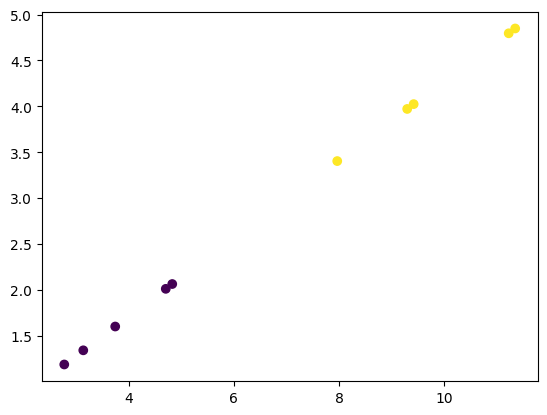

In [90]:
plt.scatter(df_new.iloc[:, 0], df_new.iloc[:, 1], c=df.iloc[:, 2])